<a href="https://colab.research.google.com/github/lamorrison04/Data-Science-Project-1/blob/main/Project1_Laymoni_Morrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


%matplotlib inline

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")

data.head()


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


In [ ]:
# Count the missing data per column (Q1)
print(data.isnull().sum())

age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64


In [ ]:
# there is missing data in stroke, smoking_status_smokes, and smoking_status_formerly (drop the missing data) (Q1)
data = data.dropna()


In [ ]:
# Question 2

predictors = ["age", "hypertension", "heart_disease", "ever_married", "Residence_type", "avg_glucose_level", "bmi", "smoking_status_smokes", "smoking_status_formerly",
              "reg_to_vote", "dog_owner", "raccoons_to_fight", "fast_food_budget_month", "income_in_k", "er_visits"]

X = data[predictors]
y = data["stroke"]

continuous_vars = ["age", "avg_glucose_level", "bmi", "raccoons_to_fight", "fast_food_budget_month", "income_in_k", "er_visits"]

#Z-score your continuous/interval variables only.

zscore = StandardScaler()
zscore.fit(data[continuous_vars])
z = zscore.transform(data[continuous_vars])

#KFold

kf = KFold(n_splits = 10, shuffle = True)
kf.split(X)

# logistic regression model

lr = LogisticRegression()
train_acc = []
test_acc = []
roc_auc_scores = []

#Store both the train and test accuracy, and roc/auc scores

for train_indices, test_indices in kf.split(X):
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test  = y.iloc[test_indices]

    # model
    lr = lr.fit(X_train, y_train)

# Calculate accuracy and ROC/AUC scores
train_acc.append(accuracy_score(y_train, lr.predict(X_train)))
test_acc.append(accuracy_score(y_test, lr.predict(X_test)))
roc_auc_scores.append(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


print("Train Accuracy:", np.mean(train_acc))
print("Test Accuracy:", np.mean(test_acc))
print("ROC/AUC Score:", np.mean(roc_auc_scores))


Train Accuracy: 0.957421875
Test Accuracy: 0.9542897327707455
ROC/AUC Score: 0.7866105313092979


# **Question 2: Is the model overfit? How can you tell?**
To check for overfitting, I compared the train and test accuracy and ROC/AUC scores. If the train accuracy scores are much higher than the test accuracy and ROC/AUC scores, then the model is likely overfit.

From the output of the code above, the difference between the train and test accuracy and ROC/AUC scores is small, then the model is not overfit.



In [ ]:
#Question 3:

# Z-score continuous variables
zscore.fit(X[continuous_vars])
X[continuous_vars] = zscore.fit_transform(X[continuous_vars])

# Fit logistic regression model on all of the data
lr.fit(X_train, y_train)

# Put coefficients into a DataFrame
coef = pd.DataFrame({'predictor': X.columns, 'coefficient': lr.coef_[0]})

coef.head()



,predictor,coefficient
0,age,0.047356
1,hypertension,1.303930
2,heart_disease,1.193762
3,ever_married,-0.962279
4,Residence_type,-0.124138


Text(0.5, 1.0, 'Confusion Matrix for Model (train)')

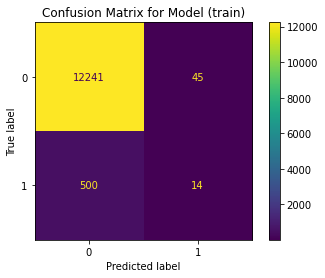

In [ ]:
# Quesion 4 (train):

ConfusionMatrixDisplay.from_predictions(y_train, lr.predict(X_train))
plt.title('Confusion Matrix for Model (train)')

Text(0.5, 1.0, 'Confusion Matrix for Model (test)')

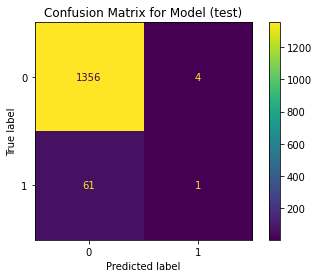

In [ ]:
# Quesion 4 (test):

ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test))
plt.title('Confusion Matrix for Model (test)')

# **Question 4: Discuss in detail what this confusion matrix tells you about your model and how can you tell.**

The confusion matrix tells us how to evaluate the performance of a model. It summarizes the predicted and actual values for a given dataset. The rows of the matrix represent the actual labels, while the columns represent the predicted labels.

In this case, I used a confusion matrix to evaluate the performance of a logistic regression model train and test set. The confusion matrix tells us the number of true positives, false positives, false negatives, and true negatives for the model.

Based on the confusion matrix above, the values that were predicted to not happen, did not happen for 1,369 values for test and for train 12,241. This means that the model did predict correctly for majority of the data. The second highest value is the bottom left which shows that for the predicted values that are to not happen did actually happen in the data set. These are the two highest values in the confusion matrix which tells us that the model has a very high accuracy in predicting true values.

# Part 2:

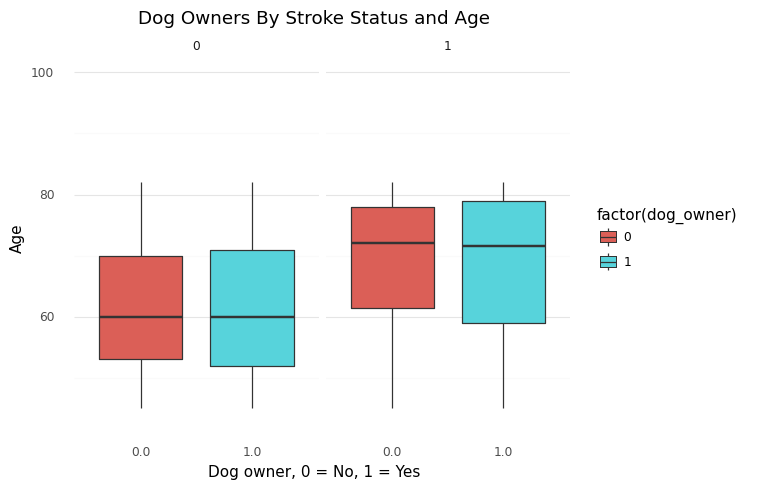


Dog owner over 50, probability of stroke:  0.25


In [ ]:
# Part 2: Question 1 - dog owners over 50

# Filter dataset for dog owners over 50
dog_owners = (data['dog_owner'] == 1) & (data['age'] > 50)

data["G1"] = dog_owners


#Group 1 Dog owners over 50
print((ggplot(data, aes(x = "factor(dog_owner)", y = "age", fill = "factor(dog_owner)"))
 + geom_boxplot()
 + ylim(45, 100)
  + facet_wrap("stroke"))
+ ggtitle("Dog Owners By Stroke Status and Age")
+ theme_minimal()
+ labs(x = "Dog owner, 0 = No, 1 = Yes", y = "Age")
+ theme(panel_grid_major_x = element_blank())
)
print("Dog owner over 50, probability of stroke: ", round(data.G1.sum()/data.G1.count(), 2))



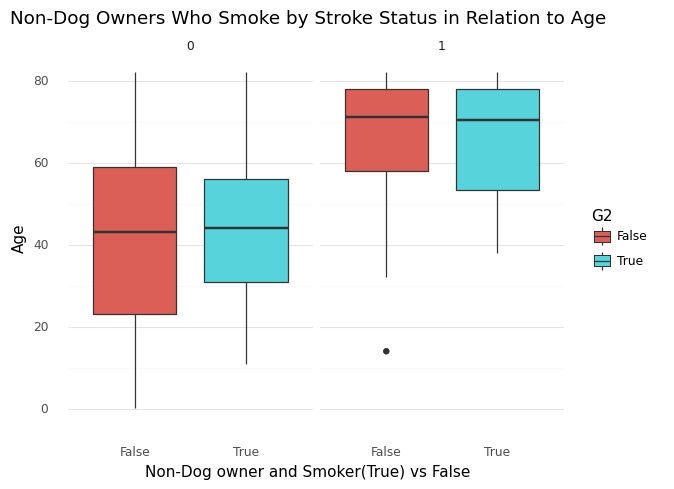


Non-dog owner who smokes, probability of stroke:  0.06


In [ ]:
# Part 2: Question 1 - non-dog owners who currently smoke

# Filter dataset for non-dog owners who currently smoke
non_dog_smokers = (data['dog_owner'] == 0) & (data['smoking_status_smokes'] == 1)

data["G2"] = non_dog_smokers


#Group 2 Non-dog owner who smokes
print(ggplot(data, aes(x = "G2", y = "age", fill = "G2"))
 + geom_boxplot()
  + facet_wrap("stroke")
  + ggtitle("Non-Dog Owners Who Smoke by Stroke Status in Relation to Age")
  +labs (x = "Non-Dog owner and Smoker(True) vs False", y = "Age")
  + theme_minimal()
  + theme(panel_grid_major_x = element_blank())
  )

print("Non-dog owner who smokes, probability of stroke: ", round(data.G2.sum()/data.G2.count(), 2))


# **Question 1: Discussion**

Based on the output of the code above, we can see that the average probability of stroke for dog owners over 50 is 25%, while the average probability of stroke for non-dog owners who currently smoke is 6%. This suggests that the group of people who are dog owners over 50 have a higher average probability of stroke than the group of people who are non-dog owners who currently smoke.

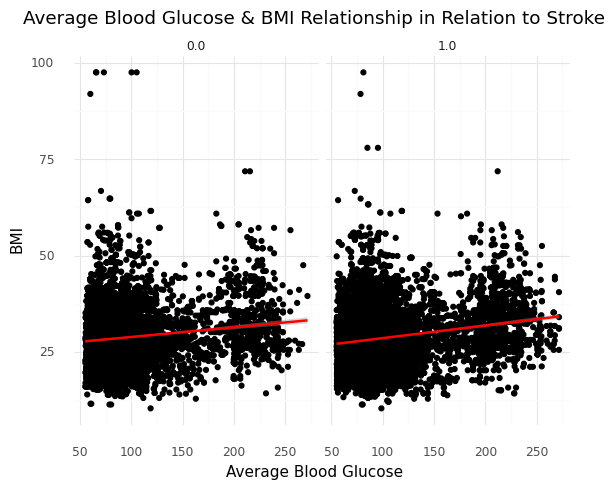

<ggplot: (8728816678867)>

In [ ]:
# Part 2 Question 2

(ggplot(data, aes(y = "bmi", x = "avg_glucose_level"))
 + geom_point()
  + facet_wrap("~reg_to_vote")
   + stat_smooth(method = "lm", color = "red")
   + theme_minimal()
   +labs(x = "Average Blood Glucose", y = "BMI")
   +ggtitle("Average Blood Glucose & BMI Relationship in Relation to Stroke")
   )

# **Part 2 Question 2 Discussion**

The graphs suggest that there is a slight positive relationship between average blood glucose level and BMI, but the relationship is not very strong. The pattern of the relationship appears to be similar for married and unmarried individuals, but the line looks a little bit more upwards for the people who are registered to vote, but there might be more people that have higher BMI's in relation to voting.

Income under 30K accuracy:  0.943
Income between 30-90K accuracy:  0.241
Income over 90K accuracy:  0.776


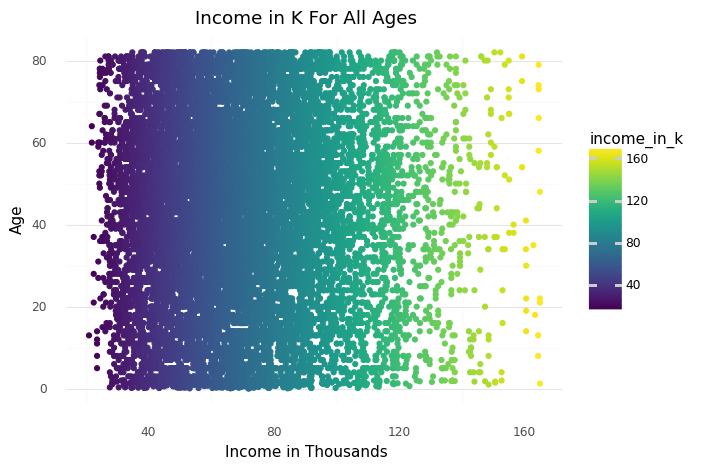

<ggplot: (8728814853006)>

In [ ]:
# Part 2 Question 3

thirtyK = data["income_in_k"] < 30
between = (data["income_in_k"] > 30) & (data["income_in_k"] < 90)
overK = data["income_in_k"] > 90

data.loc[thirtyK]
data.loc[between]
data.loc[overK]

print("Income under 30K accuracy: ", round(accuracy_score(thirtyK, data["stroke"]), 3))
print("Income between 30-90K accuracy: ", round(accuracy_score(between, data["stroke"]), 3))
print("Income over 90K accuracy: ", round(accuracy_score(overK, data["stroke"]), 3))

(ggplot(data, aes(x = "income_in_k", y = "age", color = "income_in_k"))
 + geom_point()
 +theme_minimal()
 +labs(x = "Income in Thousands", y = "Age")
 +ggtitle("Income in K For All Ages")
 + theme(panel_grid_major_x = element_blank())
 )

# **Part 2 Question 3 Discussion**

Income group 1, which corresponds to people who make under 30k, has the highest accuracy at 0.943, followed by income group 3, which corresponds to people who make more than 90k, at 0.776, and income group 2, which corresponds to people who make between 30-90k, at 0.241.

There are several potential ethical implications if the model were more accurate for certain income groups. For example, if the model were more accurate for people who make less than 30k, it could potentially reinforce socioeconomic inequality by denying insurance or medical care to low-income individuals who may already face barriers to accessing healthcare. If the model were more accurate for people who make over 90k, it could reinforce existing disparities in access to high-quality healthcare for wealthier individuals. It is important to carefully consider the potential biases and ethical implications of any predictive model, and to work towards ensuring that the model is fair and equitable for all groups.

Dog Owner:  0.41224862888482633
Residence Type:  0.49149205456335254
Married:  0.38313879904373505
Registered to Vote:  0.4160455632119252


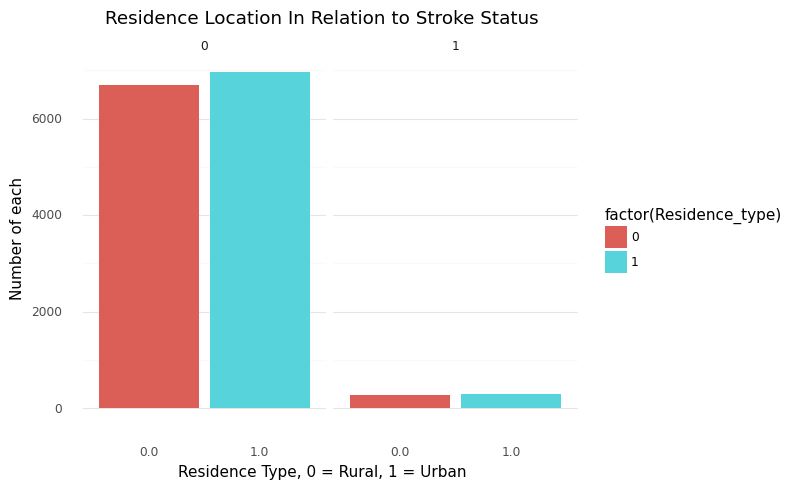

<ggplot: (8728816483548)>

In [ ]:
# Part 2 Question 4

print("Dog Owner: ", accuracy_score(data["dog_owner"], data["stroke"]))
print("Residence Type: ", accuracy_score(data["Residence_type"], data["stroke"]))
print("Married: ", accuracy_score(data["ever_married"], data["stroke"]))
print("Registered to Vote: ", accuracy_score(data["reg_to_vote"], data["stroke"]))

(ggplot(data, aes(x = "factor(Residence_type)", fill = "factor(Residence_type)"))
 + geom_bar()
  + facet_wrap("stroke")
  + labs(x = "Residence Type, 0 = Rural, 1 = Urban", y = "Number of each")
  + ggtitle("Residence Location In Relation to Stroke Status")
  +theme_minimal()
  + theme(panel_grid_major_x = element_blank())
  )


# **Part 2 Question 4 Discussion**

Based on the output of the code above, we can see that the variable with the largest coefficient is Residence Type, with a coefficient of 0.491. This suggests that living in an urban residence is the strongest predictor of having a stroke, holding all other variables constant. In the graph 1 means Urban so living in a Residence Urban Type community means that you are more likely to have a stroke.

Average ER vists per year with Stroke 0.14571285474391976
Average ER visits per year without Stroke 0.7700354208476468


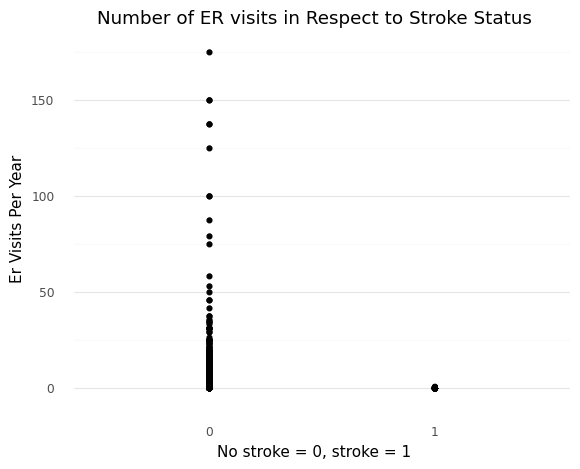

<ggplot: (8728816845740)>

In [ ]:
# Part 2 Question 5

er_visits_per_year = data["er_visits"] / data["age"]

data["er_visits_per_year"] = er_visits_per_year

strokes = data["stroke"] == 1
noS = data["stroke"] == 0

print("Average ER vists per year with Stroke", data.er_visits_per_year.loc[strokes].mean())
print("Average ER visits per year without Stroke", data.er_visits_per_year.loc[noS].mean())

(ggplot(data, aes(x = "factor(stroke)", y = "er_visits_per_year"))
 + geom_point()
 + labs(x = "No stroke = 0, stroke = 1", y = "Er Visits Per Year")
  +ggtitle("Number of ER visits in Respect to Stroke Status")
  +theme_minimal()
  + theme(panel_grid_major_x = element_blank())
)

# **Part 2 Question 5 Discussion**

The graph shows the distribution of the number of ER visits per year by stroke status. We can see that there are some differences in the distribution between the two groups, with non-stroke patients having a slightly higher median and a wider range of values compared to stroke patients.

These results suggest that the number of ER visits per year may be a useful predictor of stroke risk, and could potentially be included as a predictor variable in future models. It's important to note that the causal relationship between ER visits and stroke is not clear, and there may be other factors that influence both variables, such as underlying health conditions or lifestyle factors.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null
# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended␣texlive-plain-generic
# installing pypandoc
!pip install pypandoc
# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')
# copying your file over. Change "Class6-Completed.ipynb" to whatever your␣file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Project1_Laymoni_Morrison.ipynb" ./
# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see␣top of notebook)
!jupyter nbconvert --to PDF "Project1_Laymoni_Morrison.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-ut